# Libraries

In [ ]:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
from sklearn import preprocessing as prepro
import seaborn as sns
from collections import deque
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.io import arff
from sklearn import preprocessing as prepro
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [ ]:
def plot_dimension_reduction(X, labels, method='t-SNE'):
    if method == 't-SNE':
        # Set perplexity to a value smaller than the number of samples
        reducer = TSNE(n_components=2, perplexity=2, random_state=42)  # Adjust perplexity
        X_reduced = reducer.fit_transform(X)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=2, random_state=42)
        X_reduced = reducer.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.colorbar(scatter)
    plt.title(f"{method} - Clustering Visualization")
    plt.show()

# Clustering dataset

Heart-Disease-patients dataset

In [ ]:
!wget https://api.openml.org/data/v1/download/22102387/Heart-Disease-patients.arff

--2024-12-12 10:23:28--  https://api.openml.org/data/v1/download/22102387/Heart-Disease-patients.arff
Resolving api.openml.org (api.openml.org)... 131.155.11.11
Connecting to api.openml.org (api.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18620 (18K)
Saving to: ‘Heart-Disease-patients.arff’

Heart-Disease-patie 100%[===================>]  18.18K  --.-KB/s    in 0.1s    

2024-12-12 10:23:29 (180 KB/s) - ‘Heart-Disease-patients.arff’ saved [18620/18620]



In [ ]:
#!wget https://api.openml.org/data/v1/download/21715139/S1.arff

In [ ]:
data = arff.loadarff('Heart-Disease-patients.arff')
df = pd.DataFrame(data[0])
print(df.head())

    id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0  1.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1  2.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2  3.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3  4.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4  5.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slope  
0      2.3    3.0  
1      1.5    2.0  
2      2.6    2.0  
3      3.5    3.0  
4      1.4    1.0  


In [ ]:
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [ ]:
df.drop(columns= ['id'], inplace=True)
scaler = prepro.MinMaxScaler().fit(df)
norm_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
print(norm_df.head())

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope  
0  0.370968    1.0  
1  0.241935    0.5  
2  0.419355    0.5  
3  0.564516    1.0  
4  0.225806    0.0  


# Dataset

https://openml.org/search?type=data&sort=runs&status=active&id=37

In [ ]:
!pip install openml
import openml
dataset = openml.datasets.get_dataset(41021)
dataset

In [ ]:
!wget https://api.openml.org/data/v1/download/37/diabetes.arff

--2024-11-06 14:42:30--  https://api.openml.org/data/v1/download/37/diabetes.arff
Resolving api.openml.org (api.openml.org)... 131.155.11.11
Connecting to api.openml.org (api.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37419 (37K) [text/plain]
Saving to: ‘diabetes.arff’

diabetes.arff       100%[===================>]  36.54K  --.-KB/s    in 0.1s    

2024-11-06 14:42:31 (360 KB/s) - ‘diabetes.arff’ saved [37419/37419]



In [ ]:
data = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
print(df.head())

   preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'


In [ ]:
df['class'].replace([b'tested_negative',b'tested_positive'], [0,1], inplace=True)
print(df.head())

   preg   plas  pres  skin   insu  mass   pedi   age  class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0      1
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0      0
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0      1
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0      0
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0      1


In [ ]:
df.isnull().sum()

,0
preg,0
plas,0
pres,0
skin,0
insu,0
mass,0
pedi,0
age,0
class,0


In [ ]:
scaler = prepro.MinMaxScaler().fit(df)
normalized_attr = scaler.transform(df)
normalized_df = pd.DataFrame(normalized_attr, columns=df.columns)
print(normalized_df.head())

       preg      plas      pres      skin      insu      mass      pedi  \
0  0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1  0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2  0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3  0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4  0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   

        age  class  
0  0.483333    1.0  
1  0.166667    0.0  
2  0.183333    1.0  
3  0.000000    0.0  
4  0.200000    1.0  


In [ ]:
#normalized_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
#plt.show()

In [ ]:
#normalized_df.hist()
#plt.show()

# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are close to each other based on a distance measurement and a minimum number of points required to form a cluster.

**Core Points**: Points that have at least min_samples points (including themselves) within a radius epsilon.

**Border Points**: Points that are within epsilon distance from a core point but have fewer than min_samples points within epsilon.

**Noise Points**: Points that are neither core nor border points.

In [ ]:
# Calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

#epsilon - Maximum distance between two samples to be considered as neighbors
#min_samples - Minimum number of points to form a dense region (core points)
# DBSCAN algorithm
def dbscan(X, epsilon, min_samples):
    n_samples = len(X)
    labels = [-1] * n_samples  # -1 indicates noise by default
    visited = [False] * n_samples
    cluster_id = 0

    # Given a point index, returns all the points within epsilon distance of the given point.
    def region_query(p_idx):
        neighbors = []
        for i in range(n_samples):
            if euclidean_distance(X[p_idx], X[i]) <= epsilon:
                neighbors.append(i)
        return neighbors

    # assigns a cluster label to all points in a cluster by expanding the region defined by core points.
    def expand_cluster(p_idx, neighbors, cluster_id):
        labels[p_idx] = cluster_id
        queue = deque(neighbors)

        while queue:
            current_point_idx = queue.popleft()
            if not visited[current_point_idx]:
                visited[current_point_idx] = True
                current_neighbors = region_query(current_point_idx)

                if len(current_neighbors) >= min_samples:
                    queue.extend(current_neighbors)

            if labels[current_point_idx] == -1:  # Mark as part of the current cluster
                labels[current_point_idx] = cluster_id

    # Main loop to go through all points
    for i in range(n_samples):
        if visited[i]:
            continue

        visited[i] = True
        neighbors = region_query(i)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(i, neighbors, cluster_id)

    return labels


Testing

In [ ]:
X = np.array(norm_df)

# DBSCAN parameters
epsilon = 0.5  # Maximum distance between two samples to be considered as neighbors
min_samples = 7  # Minimum number of points to form a dense region (core points)

labels = dbscan(X, epsilon, min_samples)
print("Cluster Labels:", labels)

Cluster Labels: [-1, 1, 1, -1, 8, 2, -1, -1, 3, -1, 4, 10, -1, 2, 12, 2, -1, 2, 5, 2, -1, -1, 3, 9, 1, 6, 5, -1, 2, 1, 5, -1, 2, 4, 11, 2, 1, 1, 7, -1, 10, -1, 5, 12, 8, 3, 2, 3, -1, -1, 5, 2, 9, 9, 11, 1, 4, 9, -1, -1, -1, -1, 1, -1, 4, 1, 3, 9, -1, 4, 5, -1, 7, 9, 9, 8, 1, 8, 3, -1, 1, 10, 9, -1, 2, 9, 9, 8, 8, 8, 3, -1, 4, 6, 8, 11, 1, 10, 2, 9, 9, 9, 8, -1, 4, 2, 11, 3, 7, 4, -1, -1, -1, -1, 6, 4, -1, 5, -1, 3, -1, -1, 7, -1, -1, 10, -1, 7, 2, 5, 3, 11, 9, -1, 6, 10, -1, 3, 7, -1, -1, -1, 12, 7, 1, 2, -1, 2, 9, 5, -1, 10, -1, 1, -1, 3, 11, 9, 3, 2, 12, -1, 6, 10, 12, 11, 2, -1, -1, 6, 7, -1, -1, 10, 3, 7, 12, 1, 2, -1, 3, -1, 9, -1, 8, 5, -1, -1, 9, 3, 2, 7, -1, -1, 10, 1, -1, -1, 5, 9, 8, -1, 12, 5, 2, 1, 1, 1, 2, -1, 5, -1, 3, -1, 2, 3, 5, -1, 6, 9, -1, 8, 5, 7, -1, 5, 2, 5, 1, -1, 10, -1, 9, -1, 5, 1, -1, 9, 6, 2, 2, 5, 5, 4, -1, 4, 2, 1, 2, -1, 7, 4, 7, 8, 4, 6, 5, -1, 9, 2, 6, -1, 5, 2, 1, 7, -1, -1, 2, 2, -1, 9, 7, 6, 2, -1, 10, 6, 9, 6, 7, 2, -1, 2, 2, -1, -1, 4, 9, -1, 3, 5

In [ ]:
set(labels)

{-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

Analysis

In [ ]:
# Evaluate Clustering with Calinski-Harabasz and Davies-Bouldin scores
def evaluate_clustering(X, labels):
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    return ch_score, db_score

# Dimensionality Reduction using t-SNE and UMAP
def plot_dimension_reduction(X, labels):
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(X)

    # Apply UMAP
    umap_model = umap.UMAP(n_components=2, random_state=42)
    umap_result = umap_model.fit_transform(X)

    # Plot t-SNE
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
    plt.title(f"t-SNE")
    plt.colorbar()

    # Plot UMAP
    plt.subplot(1, 2, 2)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='viridis')
    plt.title(f"UMAP")
    plt.colorbar()

    plt.show()

Cluster Labels: [9, 1, 1, 2, 3, 2, 3, 4, 5, 6, 2, 3, 6, 2, 7, 2, 2, 2, 3, 2, 1, -1, 5, 5, 1, 3, 3, -1, 2, 1, 3, -1, 2, 2, 8, 2, 1, 1, 8, -1, 3, 8, 3, 7, 3, 5, 2, 5, -1, 9, 3, 2, 5, 5, 8, 1, 2, 5, 5, -1, 4, 4, 1, -1, 2, 1, 5, 5, 1, 2, 3, 7, 8, 5, 5, 3, 1, 3, 5, 1, 1, 3, 5, 6, 2, 5, 5, 3, 3, 3, 5, 3, 2, 3, 3, 8, 1, 3, 2, 5, 5, 5, 3, -1, 2, 2, 8, 5, 8, 2, 4, 6, 5, -1, 3, 2, 9, 3, 6, 5, 6, 3, 8, 8, 9, 3, -1, 8, 2, 3, 5, 8, 5, 1, 3, 3, 8, 5, 8, 9, 8, 5, 7, 8, 1, 2, 9, 2, 5, 3, 7, 3, 3, 1, 1, 5, 8, 5, 5, 2, 7, 1, 3, 3, 7, 8, 2, -1, 1, 3, 8, 1, 4, 3, 5, 8, 7, 1, 2, 9, 5, 4, 5, 5, 3, 3, -1, 8, 5, 5, 2, 8, 6, -1, 3, 1, 9, 4, 3, 5, 3, 4, 7, 3, 2, 1, 1, 1, 2, 4, 3, -1, 5, -1, 2, 5, 3, 4, 3, 5, 4, 3, 3, 8, 4, 3, 2, 3, 1, 1, 3, 4, 5, -1, 3, 1, 6, 5, 3, 2, 2, 3, 3, 2, -1, 2, 2, 1, 2, 9, 8, 2, 8, 3, 2, 3, 3, 3, 5, 2, 3, -1, 3, 2, 1, 8, -1, 7, 2, 2, 1, 5, 8, 3, 2, 5, 3, 3, 5, 3, 8, 2, 4, 2, 2, -1, -1, 2, 5, 2, 5, 3, 8, 1, 4, 2, 9, 4, 2, 7, 8, 3, 2]
Calinski-Harabasz Index: 55.827081111471436
Davies-Bo

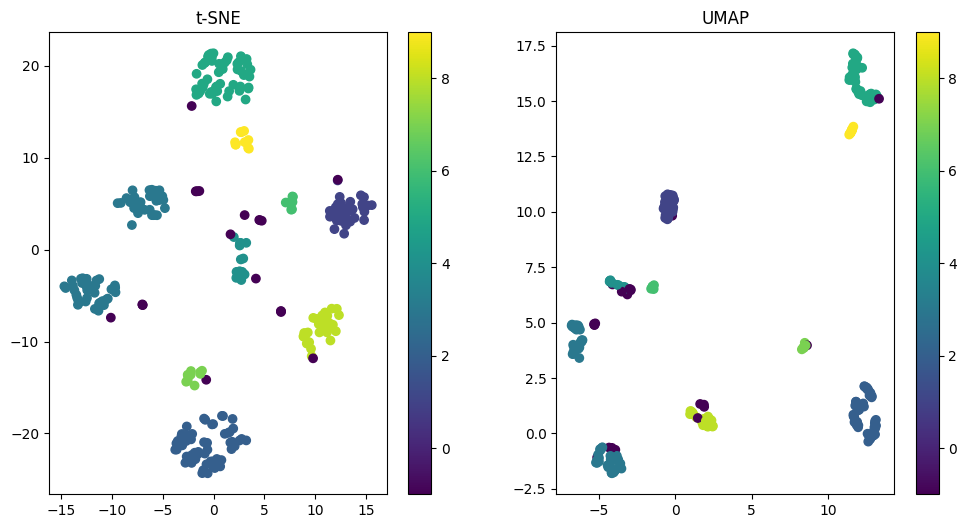

In [ ]:
# DBSCAN parameters
epsilon = 0.8
min_samples = 5

# DBSCAN
labels = dbscan(X, epsilon, min_samples)
print("Cluster Labels:", labels)

# Evaluate Clustering with Calinski-Harabasz and Davies-Bouldin indices
ch_score, db_score = evaluate_clustering(X, labels)
print("Calinski-Harabasz Index:", ch_score) # A higher value indicates better-defined clusters
print("Davies-Bouldin Index:", db_score) # A lower value indicates better clustering.

# Plot with t-SNE and UMAP
plot_dimension_reduction(X, labels)

In [ ]:
from sklearn.cluster import DBSCAN
X = np.array(norm_df)
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X)

lab= dbscan.labels_
set(lab)
ch_score, db_score = evaluate_clustering(X, lab)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)

Calinski-Harabasz Index: 55.827081111471436
Davies-Bouldin Index: 1.5411474553559048


# K-means

In [ ]:
def k_means(X, k, max_iters=100, tol=1e-4):
    # X: Input data, a numpy array of shape (n_samples, n_features)
    # k: Number of clusters
    # max_iters: Maximum number of iterations
    # tol: Convergence tolerance (stopping criteria)

    # Initialize centroids by randomly selecting k data points
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Step 1: Assign each sample to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2) # compute the distance to each of the k centroids using Euclidean distance
        labels = np.argmin(distances, axis=1)

        # Step 2: Recompute centroids as the mean of the points in each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 3: Check for convergence (if centroids do not change)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, labels


Testing

In [ ]:
X = np.array(norm_df)
# Run k-means with k clusters
k = 7
centroids, labels = k_means(X, k)

print("Centroids:")
print(centroids)
print("\nLabels (cluster assignment for each point):")
print(labels)

Centroids:
[[0.51145833 0.         0.6        0.31462264 0.25878995 0.075
  0.         0.63416031 0.         0.09354839 0.2       ]
 [0.45772059 1.         0.6372549  0.31631521 0.23583132 0.17647059
  0.         0.66400988 0.         0.11266603 0.19852941]
 [0.53961749 1.         0.6010929  0.39251469 0.2695561  0.16393443
  0.99180328 0.65411087 0.         0.15626653 0.30327869]
 [0.56831395 1.         0.93023256 0.34488811 0.27333546 0.18604651
  1.         0.46831173 1.         0.2531883  0.41860465]
 [0.6047619  0.         0.72380952 0.37061995 0.35296804 0.11428571
  0.98571429 0.61025082 0.         0.16036866 0.28571429]
 [0.53247549 1.         0.84313725 0.33684795 0.2704808  0.08823529
  0.         0.506511   1.         0.26944972 0.39705882]
 [0.5625     0.         0.90909091 0.47469983 0.33447489 0.22727273
  0.54545455 0.57633588 1.         0.19134897 0.43181818]]

Labels (cluster assignment for each point):
[2 3 3 1 4 1 4 6 2 3 1 4 3 1 1 1 1 1 0 1 3 4 2 2 3 0 0 0 1 3 0 5 1

Analysis

Calinski-Harabasz Index: 69.00646838743499
Davies-Bouldin Index: 1.412815334437769


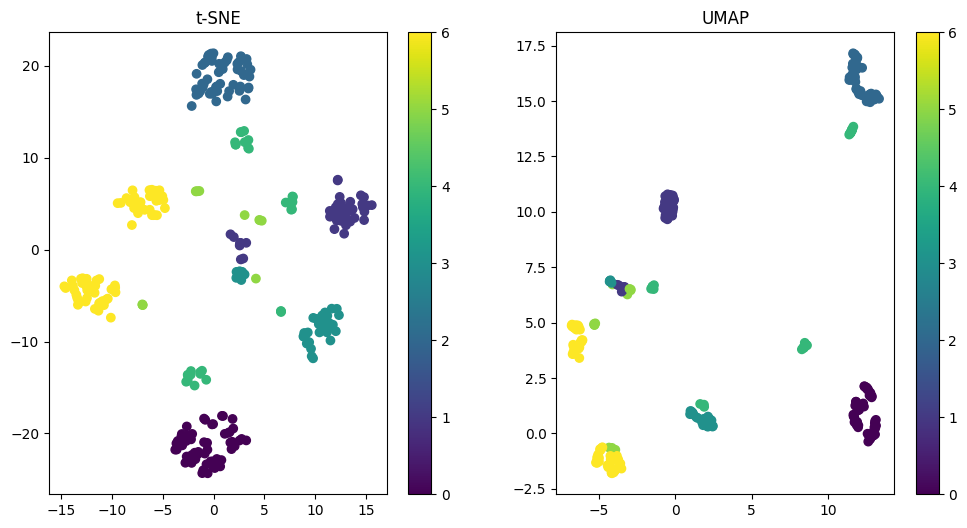

In [ ]:
k = 7
centroids, labels = k_means(X, k)

# Evaluate Clustering with Calinski-Harabasz and Davies-Bouldin indices
ch_score, db_score = evaluate_clustering(X, labels)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)

# Plot with t-SNE and UMAP
plot_dimension_reduction(X, labels)

# Hierarchical algorithm

Agglomerative Hierarchical Clustering (bottom-up approach). The algorithm starts by treating each data point as its own cluster and then iteratively merges the two closest clusters until all points are in a single cluster.

In [ ]:
# Function to compute the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Function to calculate pairwise distances between clusters
# For each pair of clusters, it calculates the average distance between all points in the first cluster and all points in the second cluster.
def compute_distances(clusters, data):
    n = len(clusters)
    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            # Get the centroids of the clusters
            cluster_i = np.array([data[idx] for idx in clusters[i]])
            cluster_j = np.array([data[idx] for idx in clusters[j]])

            # Compute the average pairwise distance between the two clusters
            distance = np.mean([euclidean_distance(x, y) for x in cluster_i for y in cluster_j])
            distances[i, j] = distances[j, i] = distance
    return distances

# Agglomerative Hierarchical Clustering Algorithm
def agglomerative_clustering(X, num_clusters=2):
    n_samples = len(X)

    # Initially, each data point is its own cluster
    clusters = [[i] for i in range(n_samples)]  # List of lists: each list contains the index of a data point

    # Repeat until we reach the desired number of clusters
    while len(clusters) > num_clusters:
        # Step 1: Compute pairwise distances between all clusters
        distances = compute_distances(clusters, X)

        # Step 2: Find the two closest clusters
        min_dist = np.inf
        to_merge = (0, 0)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if distances[i, j] < min_dist:
                    min_dist = distances[i, j]
                    to_merge = (i, j)

        # Step 3: Merge the two closest clusters
        i, j = to_merge
        new_cluster = clusters[i] + clusters[j]

        # Remove the merged clusters and add the new cluster
        clusters = [clusters[k] for k in range(len(clusters)) if k != i and k != j]
        clusters.append(new_cluster)

    # Return the final clusters
    return clusters


Testing

In [ ]:
X = np.array(norm_df)
num_clusters = 4
clusters = agglomerative_clustering(X, num_clusters)

print("Final Clusters:")
for cluster in clusters:
    print(f"Cluster {clusters.index(cluster) + 1}: Points {cluster}")

Final Clusters:
Cluster 1: Points [126, 113, 286]
Cluster 2: Points [224, 172, 209, 60, 294, 297, 7, 201, 231, 282, 61, 197, 217, 110, 181, 220, 233, 211, 41, 140, 292, 123, 136, 156, 54, 95, 106, 165, 34, 131, 122, 191, 108, 280, 175, 252, 300, 72, 223, 127, 250, 138, 38, 265, 272, 187, 143, 170, 9, 236, 83, 12, 111, 192, 118, 120, 20, 59, 133, 168, 161, 229, 79, 171, 270, 293, 1, 205, 153, 37, 207, 177, 55, 235, 264, 65, 2, 24, 62, 76, 206, 80, 29, 36, 144, 96, 195, 228, 247, 68, 154]
Cluster 3: Points [213, 31, 39, 266, 193, 63, 244, 71, 267, 299, 176, 43, 14, 202, 164, 142, 160, 150, 186, 0, 124, 196, 249, 116, 179, 146, 296, 49, 139, 167, 21, 261, 48, 103]
Cluster 4: Points [257, 114, 273, 218, 279, 30, 262, 117, 234, 227, 70, 203, 42, 185, 129, 256, 26, 149, 18, 242, 25, 162, 93, 277, 260, 134, 255, 169, 238, 241, 198, 291, 210, 222, 225, 50, 216, 3, 285, 16, 289, 115, 287, 243, 298, 28, 35, 268, 204, 226, 214, 246, 51, 284, 17, 248, 274, 283, 295, 240, 239, 13, 128, 5, 19, 98, 2

Analysis

Calinski-Harabasz Score: 45.37262713239296
Davies-Bouldin Score: 1.501813014232698


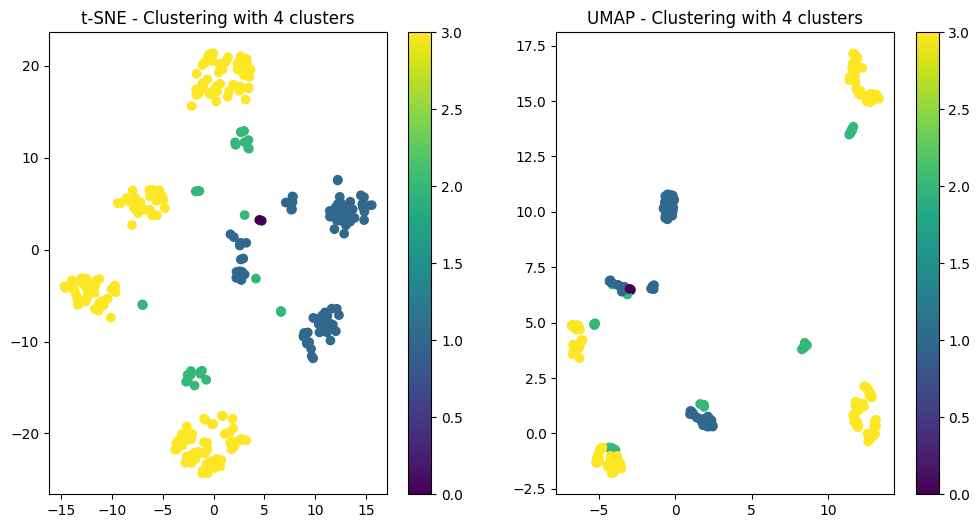

In [ ]:
def plot_clusters(X, clusters, title):
    # Create a label for each cluster
    labels = np.zeros(len(X))
    for cluster_idx, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = cluster_idx

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(X)

    # Apply UMAP
    umap_model = umap.UMAP(n_components=2, random_state=42)
    umap_result = umap_model.fit_transform(X)

    # Plot t-SNE
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
    plt.title(f"t-SNE - {title}")
    plt.colorbar()

    # Plot UMAP
    plt.subplot(1, 2, 2)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='viridis')
    plt.title(f"UMAP - {title}")
    plt.colorbar()

    plt.show()


# Calculate internal evaluation metrics
# Flatten the clusters list for compatibility with evaluation metrics
flat_labels = np.zeros(len(X))
for cluster_idx, cluster in enumerate(clusters):
    for idx in cluster:
        flat_labels[idx] = cluster_idx

# Compute Calinski-Harabasz and Davies-Bouldin scores
ch_score = calinski_harabasz_score(X, flat_labels)
db_score = davies_bouldin_score(X, flat_labels)

print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Score: {db_score}")

# Plot clusters with t-SNE and UMAP
plot_clusters(X, clusters, f"Clustering with {num_clusters} clusters")

# KNN

In [ ]:
# kernel functions
def uniform(d, h):
    return np.where(np.abs(d / h)<= 0.5, 1, 0)

def triangular(d, h):
    return np.where(np.abs(d) <= h, 1 - np.abs(d / h), 0)

def epanechnikov(d, h):
    return np.where(np.abs(d) <= h, 3 / 4 * (1 - (d / h) ** 2), 0)

def gaussian(d, h):
    return 1/np.sqrt(2 * np.pi)*np.exp(-0.5*(d / h)**2)

In [ ]:
class KNN:
    def __init__(self, k=3, kernel=uniform, window='fixed'):
        self.k = k
        self.kernel = kernel
        self.window = window

    def fit(self, X, y):
        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)

    def predict(self, X):
        X = np.asarray(X)
        predictions = []

        for x in X:
            # Calculate distances
            distances = np.linalg.norm(self.X_train - x, axis=1)

            # window size
            if self.window == 'fixed': # the window size is constant for all points.
                size = np.mean(distances)
            else: # the window size can change depending on the local data distribution.
                size = np.partition(distances, self.k)[self.k]  # k-th smallest distance

            # Apply kernel weights
            weights = self.kernel(distances, size)

            # Get the indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            k_weights = weights[k_indices]
            # Extract the labels of the k nearest neighbors
            k_labels = self.y_train[k_indices]
            k_labels = np.array(k_labels).flatten()
            # Weighted voting (most common class label)
            label_sum = np.bincount(k_labels, weights=k_weights, minlength=2)
            predicted_label = np.argmax(label_sum)
            predictions.append(predicted_label)

        return np.array(predictions)

Test

In [ ]:
train, test = train_test_split(normalized_df,test_size=0.3,random_state=0,stratify=normalized_df['class'])

train_X = train[train.columns[:8]]
train_Y = train[train.columns[8:]]

test_X = test[test.columns[:8]]
test_Y = test[test.columns[8:]]

X = normalized_df[normalized_df.columns[:8]]
Y = normalized_df['class']

train_X = train_X.to_numpy().astype(float)
train_Y = train_Y.to_numpy().astype(int).flatten()
test_X = test_X.to_numpy().astype(float)
test_Y = test_Y.to_numpy().astype(int).flatten()
X = X.to_numpy().astype(float)
Y = Y.to_numpy().astype(int)

knn = KNN()
knn.fit(train_X, train_Y)

predictions = knn.predict(test_X)

print("Predictions:", predictions)

Predictions: [0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Tuning

In [ ]:
# Cross-validation function
def cross_validate(model, X, y, folds=6):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=22) # k=folds, split the data into k equal parts
    f1_scores = []
    for train_index, valid_index in kfold.split(X):
      # Splitting Data
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model.fit(X_train, y_train)
        f1_scores.append(f1_score(y_test, model.predict(X_test)))

    return np.mean(f1_scores)

# hyperparameter_tuning
def hyperparameter_tuning_knn(X, y):
    best_score, best_params, scores = 0, None, []
    kernels = [uniform, triangular, epanechnikov, gaussian]
    windows = ['fixed', 'neighbor']
    k_values = [i for i in range(1,50,2)]

    for kernel in kernels:
        for window in windows:
            for k in k_values:
                model = KNN(k=k, kernel=kernel, window=window)
                score = cross_validate(model, X, y)
                scores.append({'k': k, 'kernel': kernel.__name__, 'window': window, 'f1': float(score)})

                if score > best_score:
                    best_score = score
                    best_params = {'k': k, 'kernel': kernel.__name__, 'window': window}

    return best_params, best_score, scores

In [ ]:
best_params, best_score, scores = hyperparameter_tuning_knn(X, Y)

print("Best hyperparameters:", best_params)
print("Best F1 score:", best_score)

Best hyperparameters: {'k': 15, 'kernel': 'triangular', 'window': 'fixed'}
Best F1 score: 0.5995206609860827


# Gradient Descent

Gradient descent is an optimization algorithm used to minimize the cost function in machine learning models. It works by iteratively adjusting the model parameters in the direction of the negative gradient of the cost function.

• Batch Gradient Descent: The entire dataset is used to compute the gradients once per iteration.

• Stochastic Gradient Descent: The model updates its parameters after calculating the gradient for each individual sample.

• Mini-Batch Gradient Descent: The dataset is shuffled at the beginning of each iteration, and gradients are computed using small batches of data.

In [ ]:
class GradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000, method='batch', batch_size=32):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.method = method
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            if self.method == 'batch':
                # Calculate the linear model prediction for all data
                y_predicted = np.dot(X, self.weights) + self.bias

                # Compute gradients
                dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) # vector that shows how the weights should be changed to reduce the error
                db = (1 / n_samples) * np.sum(y_predicted - y)

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            elif self.method == 'stochastic':
                # Update for each sample
                for i in range(n_samples):
                    y_predicted = np.dot(X[i], self.weights) + self.bias

                    # Compute gradients for the current sample
                    dw = (y_predicted - y[i]) * X[i]
                    db = y_predicted - y[i]

                    # Update weights and bias
                    self.weights -= self.learning_rate * dw
                    self.bias -= self.learning_rate * db

            elif self.method == 'mini-batch':
              # Shuffle the data
                indices = np.random.permutation(n_samples)
                for i in range(0, n_samples, self.batch_size):
                    batch_indices = indices[i:i + self.batch_size]
                    X_batch = X[batch_indices]
                    y_batch = y[batch_indices]

                    y_predicted = np.dot(X_batch, self.weights) + self.bias
                    dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_predicted - y_batch.flatten()))
                    db = (1 / len(y_batch)) * np.sum(y_predicted - y_batch.flatten())

                    self.weights -= self.learning_rate * dw
                    self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Test

In [ ]:
model = GradientDescent(learning_rate=0.01, n_iterations=100, method='mini-batch', batch_size=2)
model.fit(train_X, train_Y)

# Make predictions
predictions = model.predict(test_X)
predictions = (predictions > 0.5).astype(int)
print("Predictions:", predictions)

Predictions: [0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


Tuning

In [ ]:
# Cross-validation function
def cross_validate(model, X, y, folds=6):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=22) # k=folds, split the data into k equal parts
    f1_scores = []
    for train_index, valid_index in kfold.split(X):
      # Splitting Data
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions = (predictions > 0.5).astype(int)
        f1_scores.append(f1_score(y_test, predictions))

    return np.mean(f1_scores)

# hyperparameter_tuning
def hyperparameter_tuning_GD(X, y):
    best_score, best_params, scores = 0, None, []
    methods = ['mini-batch', 'stochastic', 'batch']
    learning_rates = [0.01, 0.1]
    batch_sizes = [8, 16, 32]

    for method in methods:
        for batch_size in batch_sizes:
            for learning_rate in learning_rates:
                model = GradientDescent(learning_rate=learning_rate, method=method, batch_size=batch_size)
                score = cross_validate(model, X, y)
                scores.append({'learning_rate': learning_rate, 'method': method, 'batch_size':batch_size, 'f1': float(score)})

                if score > best_score:
                    best_score = score
                    best_params = {'learning_rate': learning_rate, 'method': method, 'batch_size':batch_size}

    return best_params, best_score, scores

In [ ]:
best_params, best_score, scores = hyperparameter_tuning_GD(X, Y)

print("Best hyperparameters:", best_params)
print("Best F1 score:", best_score)

Best hyperparameters: {'learning_rate': 0.01, 'method': 'stochastic', 'batch_size': 8}
Best F1 score: 0.6423380716726421


# SVD

The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices.

In [ ]:
class SVD:
    def __init__(self, n_components):
        self.n_components = n_components
        self.U = None  # Left singular vectors
        self.S = None  # Singular values (as a diagonal matrix)
        self.Vt = None  # Right singular vectors (transposed)
        self.coef = None  # Coefficients for the linear classifier

    def fit(self, X, y):
        # Center the data
        X_centered = X - np.mean(X, axis=0)

        # Compute SVD
        self.U, self.S, self.Vt = np.linalg.svd(X_centered, full_matrices=False)

        # Select the top n_components
        self.U = self.U[:, :self.n_components]
        self.S = np.diag(self.S[:self.n_components])
        self.Vt = self.Vt[:self.n_components, :]

        # Fit a linear regression model to the transformed data
        self.coef = np.linalg.pinv(self.U) @ y  # Use pseudo-inverse for linear regression
        # the linear relationship between the transformed data (U) and the labels (y)
    def predict(self, X):
        X_centered = X - np.mean(X, axis=0)
        U_new = X_centered @ self.Vt.T[:, :self.n_components] # Transforming New Data

        # Using the linear model to make predictions
        return (U_new @ self.coef > 0).astype(int)

Testing

In [ ]:
model = SVD(n_components=20)
model.fit(train_X, train_Y)

# Make predictions
predictions = model.predict(test_X).flatten()
print("Predictions:", predictions)

Predictions: [1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


Tuning

In [ ]:
# Cross-validation function
def cross_validate(model, X, y, folds=6):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=22) # k=folds, split the data into k equal parts
    f1_scores = []
    for train_index, valid_index in kfold.split(X):
      # Splitting Data
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test).flatten()
        f1_scores.append(f1_score(y_test, predictions))

    return np.mean(f1_scores)

# hyperparameter_tuning
def hyperparameter_tuning_SVD(X, y):
    best_score, best_params, scores = 0, None, []
    components = [i for i in range(1,20)]

    for n_components in components:
        model = SVD(n_components=n_components)
        score = cross_validate(model, X, y)
        scores.append({'n_components': n_components, 'f1': float(score)})

        if score > best_score:
            best_score = score
            best_params = {'n_components': n_components}

    return best_params, best_score, scores

In [ ]:
best_params, best_score, scores = hyperparameter_tuning_SVD(X, Y)

print("Best hyperparameters:", best_params)
print("Best F1 score:", best_score)

Best hyperparameters: {'n_components': 8}
Best F1 score: 0.6758723253703632


# AdaBoost

1. Define a Weak Classifier: a decision stump as weak classifier.

2. Implement the AdaBoost Algorithm: iteratively train weak classifiers and adjust their weights based on their performance.

In [ ]:
class DecisionStump:
    def fit(self, X, y, weights):
        n_samples, n_features = X.shape
        best_stump = {}
        min_error = float('inf')

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                for inequality in ['lt', 'gt']: # 'lt': less than or equal to threshold. 'gt': greater than threshold.
                    predictions = self.predict(X, feature_index, threshold, inequality)
                    errors = predictions != y
                    weighted_error = np.dot(weights, errors)

                    if weighted_error < min_error:
                        min_error = weighted_error
                        best_stump['feature_index'] = feature_index
                        best_stump['threshold'] = threshold
                        best_stump['inequality'] = inequality

        return best_stump

    def predict(self, X, feature_index, threshold, inequality):
        predictions = np.ones(X.shape[0])
        if inequality == 'lt':
            predictions[X[:, feature_index] <= threshold] = -1
        else:
            predictions[X[:, feature_index] > threshold] = -1
        return predictions

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = [] # weights of weak classifiers
        self.stumps = [] # weak classifiers

    def fit(self, X, y):
        # Convert y from {0, 1} to {-1, 1}
        y = np.where(y == 0, -1, 1)

        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples  # Initialize weights

        for _ in range(self.n_estimators):
            stump = DecisionStump()
            best_stump = stump.fit(X, y, weights)
            predictions = stump.predict(X, best_stump['feature_index'], best_stump['threshold'], best_stump['inequality'])

            # Calculate the error and alpha (weight of the weak classifier)
            errors = predictions != y
            error_rate = np.dot(weights, errors) # calculate the weighted error

            # Avoid division by zero
            if error_rate == 0:
                error_rate = 1e-10

            alpha = 0.5 * np.log((1 - error_rate) / error_rate)
            self.alphas.append(alpha)
            self.stumps.append(best_stump)

            # Update weights
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)  # Normalize to sum to 1

    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
        for alpha, stump in zip(self.alphas, self.stumps):
            # Create a new instance of DecisionStump for prediction
            stump_instance = DecisionStump()
            predictions = stump_instance.predict(X, stump['feature_index'], stump['threshold'], stump['inequality'])
            final_predictions += alpha * predictions

        return np.where(final_predictions > 0, 1, 0)  # Convert back to {0, 1}


Testing

In [ ]:
 # Initialize and fit AdaBoost
ada_boost = AdaBoost(n_estimators=1)
ada_boost.fit(train_X, train_Y)

 # Predictions
predictions = ada_boost.predict(test_X)
print("Predictions:", predictions.astype(int))

Predictions: [1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0]


Tuning

In [ ]:
# Cross-validation function
def cross_validate(model, X, y, folds=6):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=22) # k=folds, split the data into k equal parts
    f1_scores = []
    for train_index, valid_index in kfold.split(X):
      # Splitting Data
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        f1_scores.append(f1_score(y_test, predictions))

    return np.mean(f1_scores)

# hyperparameter_tuning
def hyperparameter_tuning_Ada(X, y):
    best_score, best_params, scores = 0, None, []
    clf = [i for i in range(1,50)]

    for n_estimators in clf:
        model = AdaBoost(n_estimators=n_estimators)
        score = cross_validate(model, X, y)
        scores.append({'n_estimators':n_estimators, 'f1': float(score)})

        if score > best_score:
            best_score = score
            best_params = {'n_estimators': n_estimators}

    return best_params, best_score, scores

In [ ]:
best_params, best_score, scores = hyperparameter_tuning_Ada(X, Y)

print("Best hyperparameters:", best_params)
print("Best F1 score:", best_score)

Best hyperparameters: {'n_estimators': 49}
Best F1 score: 0.6903474039074696
